<a href="https://colab.research.google.com/github/vivek3656703/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install ipython-autotime
%load_ext autotime

time: 166 µs (started: 2021-07-11 15:35:31 +00:00)


In [6]:
import numpy as np

a = np.array([[1,2,3,4,5],
             [4,5,6,7,8]])
a.ndim

2

time: 4.63 ms (started: 2021-07-11 15:47:44 +00:00)


In [8]:
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 7.68 ms (started: 2021-07-11 15:48:25 +00:00)


In [23]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/Images/train data'
CATEGORIES = ['men','women']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array) 
    img_resized = resize(img_array,(150,250,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 765 ms (started: 2021-07-11 16:16:14 +00:00)


In [27]:
len(flat_data[0])

112500

time: 4.65 ms (started: 2021-07-11 16:31:49 +00:00)


In [28]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

time: 3.73 ms (started: 2021-07-11 16:32:36 +00:00)


<BarContainer object of 2 artists>

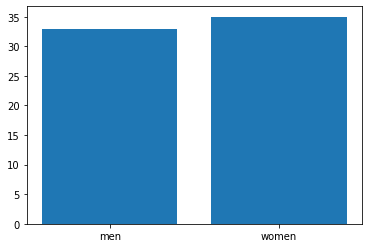

time: 120 ms (started: 2021-07-11 16:34:59 +00:00)


In [30]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=100)


time: 23.6 ms (started: 2021-07-11 16:44:08 +00:00)


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 11s (started: 2021-07-11 16:53:49 +00:00)


In [35]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0])

time: 165 ms (started: 2021-07-11 16:56:10 +00:00)


In [36]:
y_test

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0])

time: 3.33 ms (started: 2021-07-11 16:56:30 +00:00)


In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 2.52 ms (started: 2021-07-11 16:57:37 +00:00)


In [38]:
accuracy_score(y_pred,y_test)

0.5714285714285714

time: 6.81 ms (started: 2021-07-11 16:58:22 +00:00)


In [39]:
confusion_matrix(y_pred,y_test)

array([[7, 6],
       [3, 5]])

time: 6.16 ms (started: 2021-07-11 16:59:24 +00:00)


In [40]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 49.9 ms (started: 2021-07-11 17:02:42 +00:00)


In [42]:
model = pickle.load(open('img_model.p','rb'))

time: 40.8 ms (started: 2021-07-11 17:04:55 +00:00)


Enter your URLhttps://d33ljpvc0tflz5.cloudfront.net/dims3/MMH/7a11ff0/2147483647/strip/true/crop/2168x1215+0+85/resize/728x408!/quality/75/?url=https%3A%2F%2Fd26ua9paks4zq.cloudfront.net%2F8d%2Fbf%2F873c36de4af1b67e6eeb868c6559%2Fimage-getty-476804799.jpg
(408, 728, 3)
PREDICTED OUTPUT: men


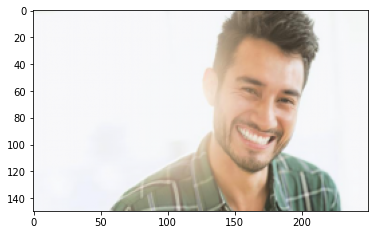

time: 6.95 s (started: 2021-07-11 17:16:36 +00:00)


In [44]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,250,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [45]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 7.8MB 8.0MB/s 
     |████████████████████████████████| 112kB 58.5MB/s 
     |████████████████████████████████| 174kB 53.2MB/s 
     |████████████████████████████████| 81kB 13.5MB/s 
     |████████████████████████████████| 4.2MB 52.0MB/s 
     |████████████████████████████████| 71kB 12.3MB/s 
     |████████████████████████████████| 122kB 58.4MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=1e73c014a49263648b0054a03a7da48e910f46065de921613391f780a0c58659
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: ipykernel 6.0.1 has requirement ipython>=7.23.1, but you'll have ipython 5.5.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 6.0.1 which is incompatible.
  Found existing installation: importlib-metadata 4.6.0
    Uninstalling importlib-metadata-4.6.0:
    

     |████████████████████████████████| 747kB 9.1MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=f599464f650b9c79af2e216503bf8fb1e09d4185ae3a323b8e9cf04f5ef15359
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok
time: 17.5 s (started: 2021-07-11 17:19:20 +00:00)
